In [1]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
application_train= dd.read_csv("../../data/application_train.csv").compute()
a = application_train.shape
print("application_train shape :({},{})".format( a[0],a[1]))

credit_card_balance= dd.read_csv("../../data/credit_card_balance.csv").compute()
a = credit_card_balance.shape
print("credit_card_balance shape :({},{})".format( a[0],a[1]))

application_train shape :(307511,122)
credit_card_balance shape :(3840312,23)


In [3]:
credit_card_balance=application_train[['TARGET','SK_ID_CURR']].merge(credit_card_balance,on='SK_ID_CURR',how ='left')
del application_train

<h2>TARGET / MONTHS_BALANCE</h2>

In [4]:
credit_card_balance.MONTHS_BALANCE.describe()

count    3.227965e+06
mean    -3.471544e+01
std      2.663609e+01
min     -9.600000e+01
25%     -5.600000e+01
50%     -2.800000e+01
75%     -1.100000e+01
max     -1.000000e+00
Name: MONTHS_BALANCE, dtype: float64

month entre 1 et 96

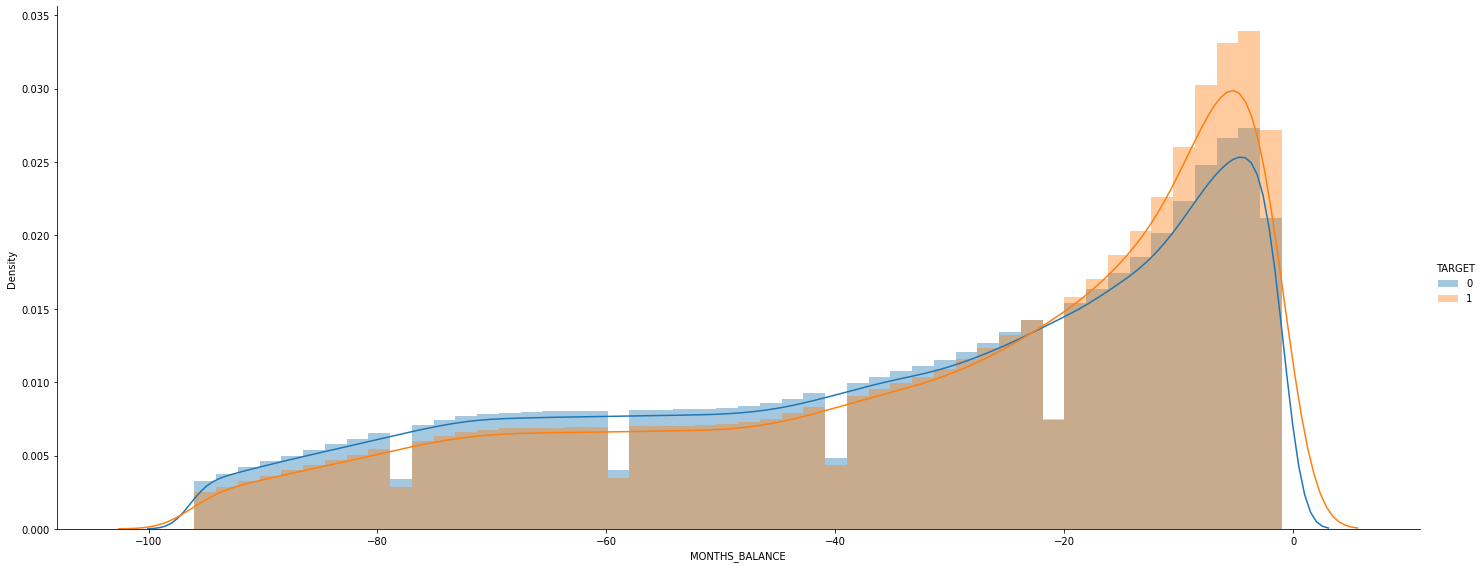

In [5]:
sns.FacetGrid(data=credit_card_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'MONTHS_BALANCE').add_legend()

<h2>TARGET / AMT_BALANCE (Solde pendant le mois de crédit précédent)</h2>

In [6]:
credit_card_balance.AMT_BALANCE.describe()

count    3.227965e+06
mean     5.907332e+04
std      1.066137e+05
min     -4.202502e+05
25%      0.000000e+00
50%      0.000000e+00
75%      9.040554e+04
max      1.354829e+06
Name: AMT_BALANCE, dtype: float64

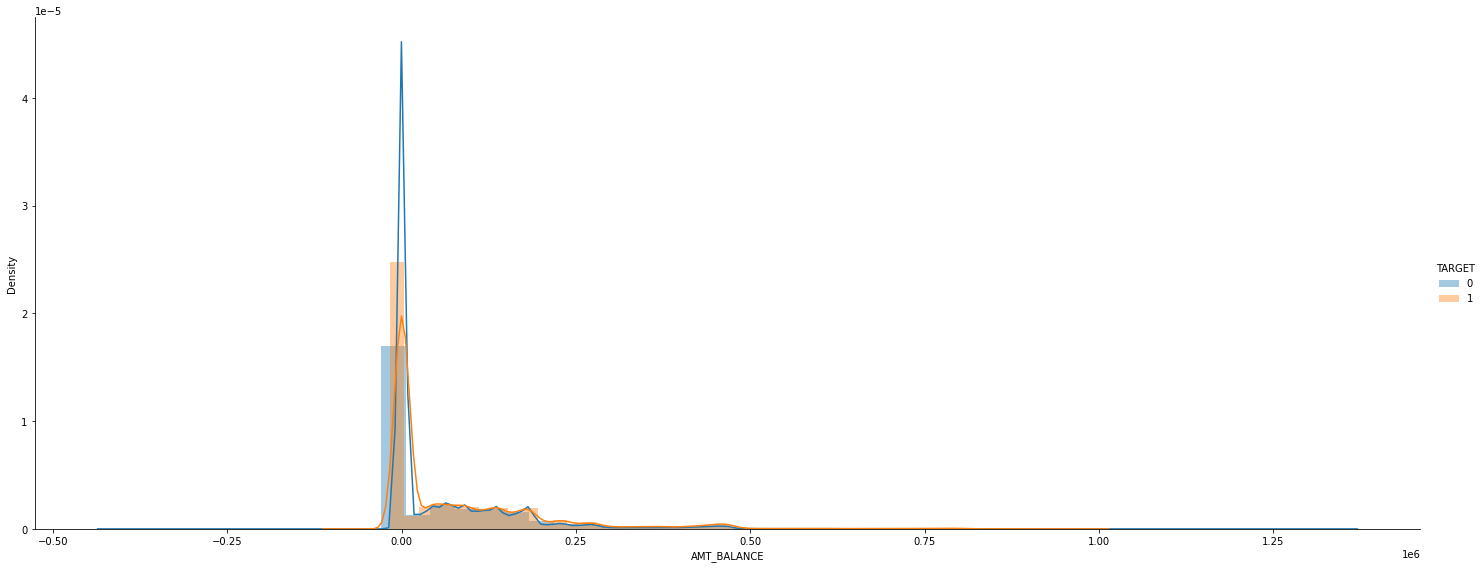

In [7]:
sns.FacetGrid(data=credit_card_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_BALANCE').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_BALANCE'>

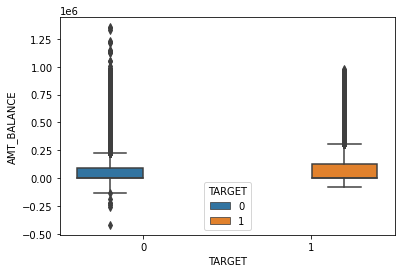

In [8]:
sns.boxplot(x='TARGET', y='AMT_BALANCE',hue='TARGET', data=credit_card_balance)

<h2>TARGET / AMT_CREDIT_LIMIT_ACTUAL (Limite de la carte de crédit pendant le mois du crédit précédent)</h2>

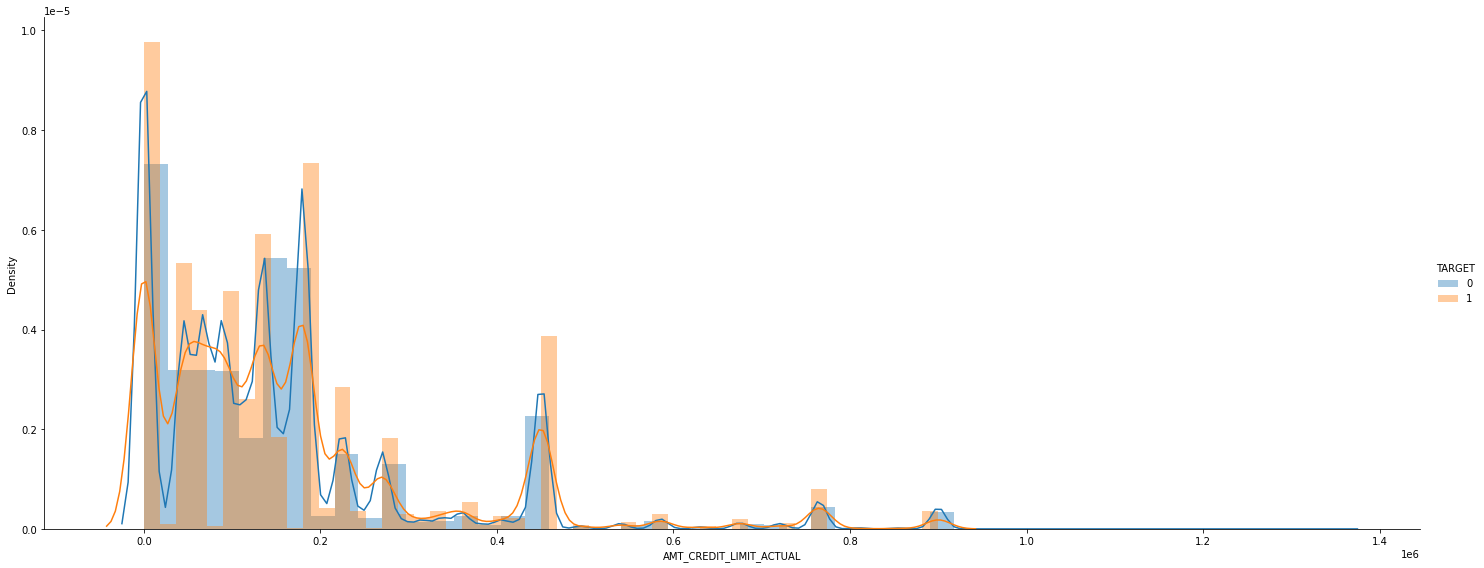

In [10]:
sns.FacetGrid(data=credit_card_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_CREDIT_LIMIT_ACTUAL').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_CREDIT_LIMIT_ACTUAL'>

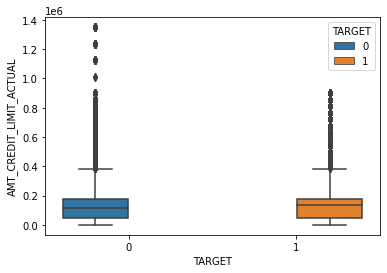

In [11]:
sns.boxplot(x='TARGET', y='AMT_CREDIT_LIMIT_ACTUAL',hue='TARGET', data=credit_card_balance)

* Pas de conclusion

<h2>TARGET / AMT_DRAWINGS_ATM_CURRENT (Montant de dessin au guichet automatique pendant le mois du crédit précédent)</h2>

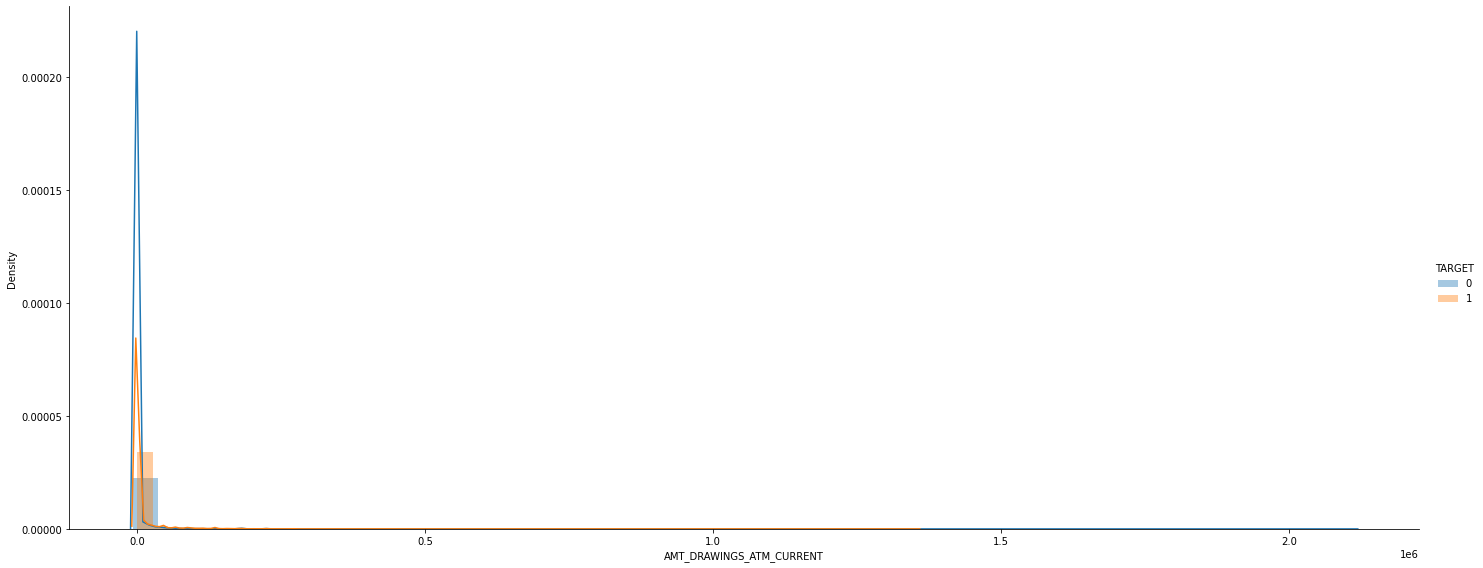

In [12]:
sns.FacetGrid(data=credit_card_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_DRAWINGS_ATM_CURRENT').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_DRAWINGS_ATM_CURRENT'>

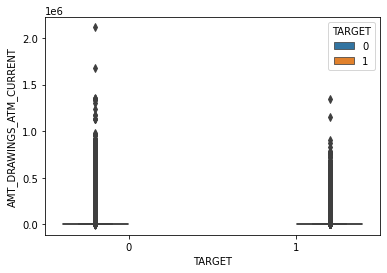

In [19]:
sns.boxplot(x='TARGET', y='AMT_DRAWINGS_ATM_CURRENT',hue='TARGET', data=credit_card_balance)

* 70% des zeros 

<h2>TARGET / AMT_DRAWINGS_CURRENT (Montant de tirage au cours du mois du crédit précédent)</h2>

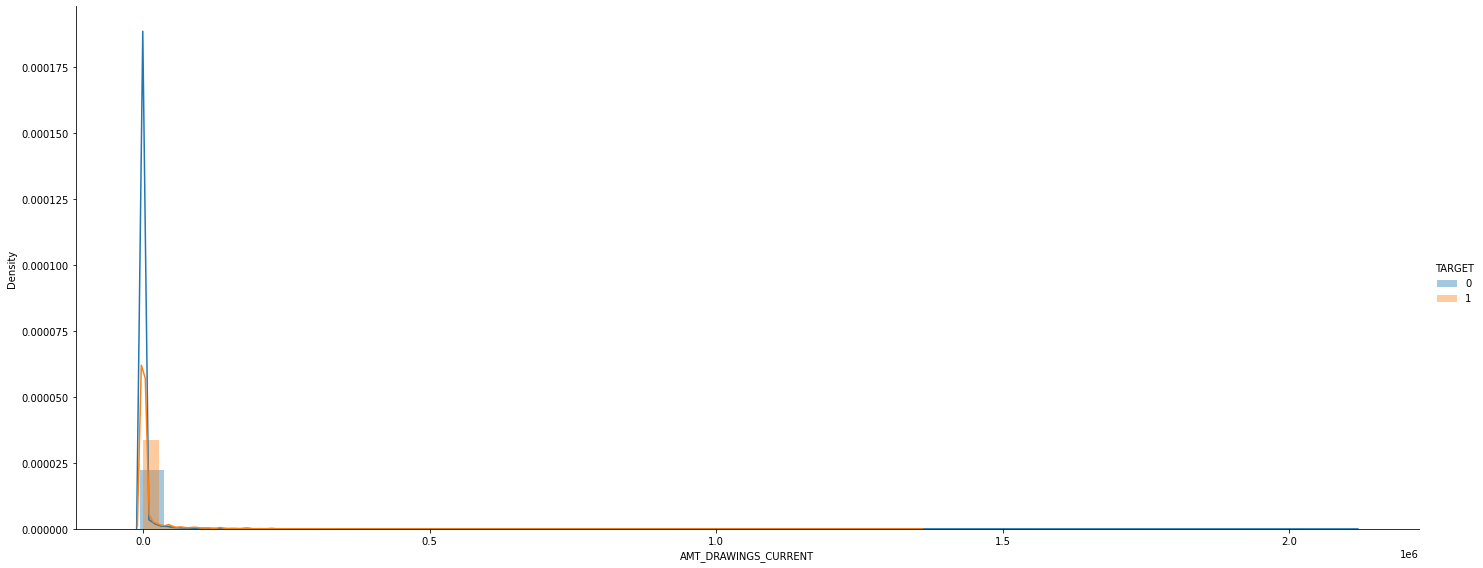

In [14]:
sns.FacetGrid(data=credit_card_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_DRAWINGS_CURRENT').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_DRAWINGS_CURRENT'>

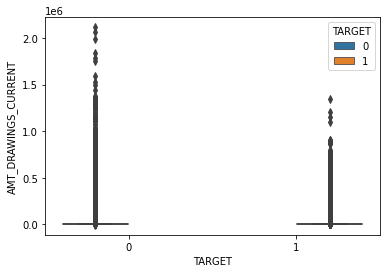

In [20]:
sns.boxplot(x='TARGET', y='AMT_DRAWINGS_CURRENT',hue='TARGET', data=credit_card_balance)

* 83.9% des zeros

<h2>TARGET / AMT_DRAWINGS_OTHER_CURRENT (Montant de tirage au cours du mois du crédit précédent)</h2>

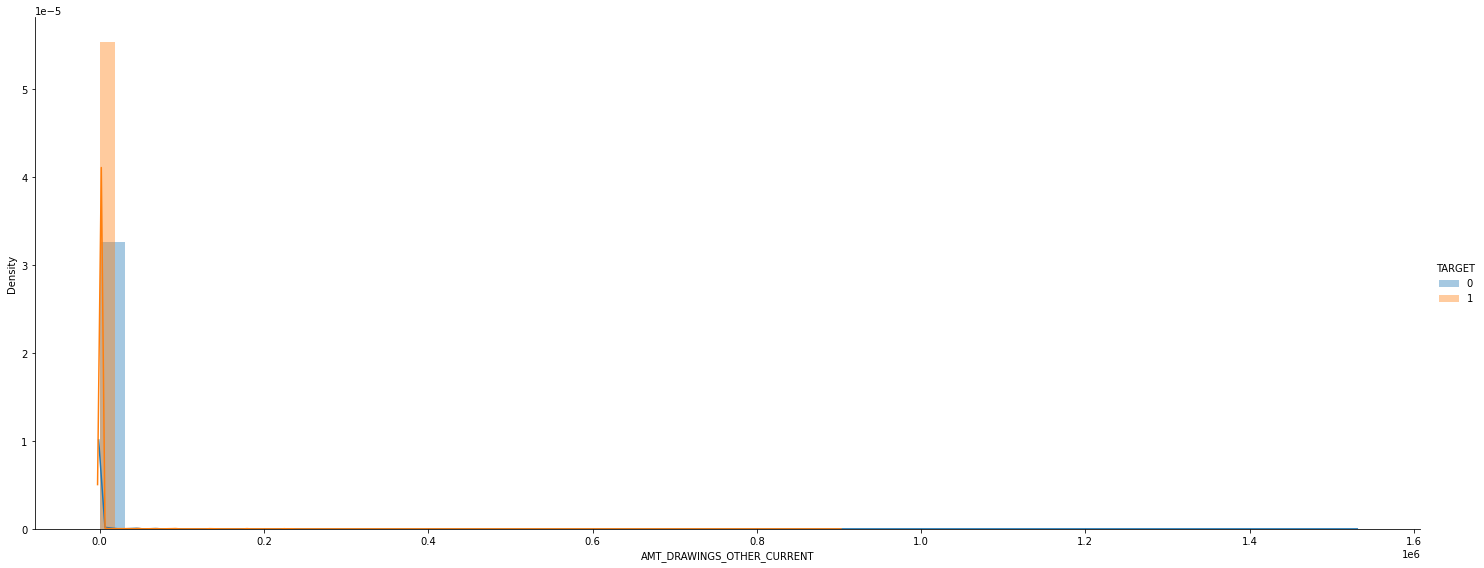

In [15]:
sns.FacetGrid(data=credit_card_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_DRAWINGS_OTHER_CURRENT').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_DRAWINGS_OTHER_CURRENT'>

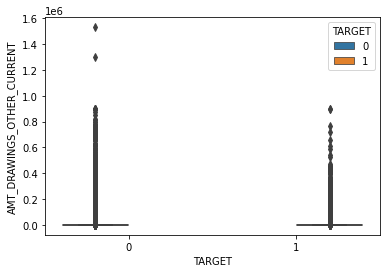

In [21]:
sns.boxplot(x='TARGET', y='AMT_DRAWINGS_OTHER_CURRENT',hue='TARGET', data=credit_card_balance)

* 80.2% des zeros
* presence des outliers 

<h2>TARGET / AMT_DRAWINGS_POS_CURRENT (Montant de dessin ou d'achat de marchandises pendant le mois du crédit précédent)</h2>

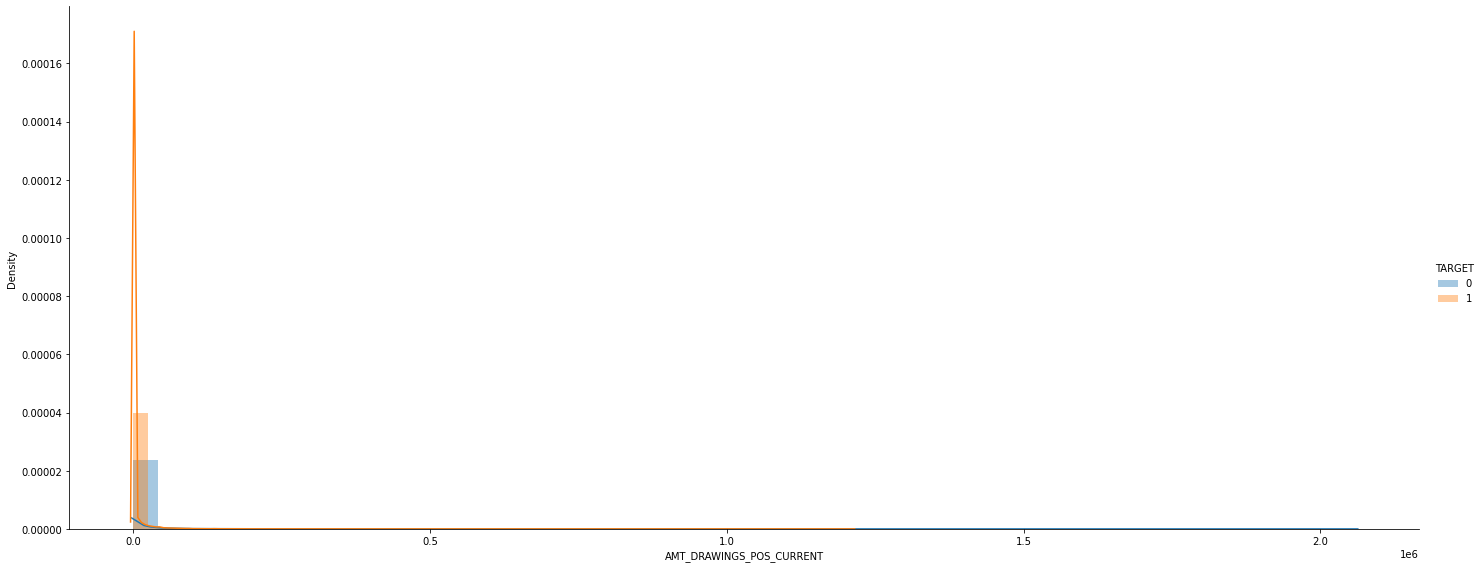

In [16]:
sns.FacetGrid(data=credit_card_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_DRAWINGS_POS_CURRENT').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_DRAWINGS_POS_CURRENT'>

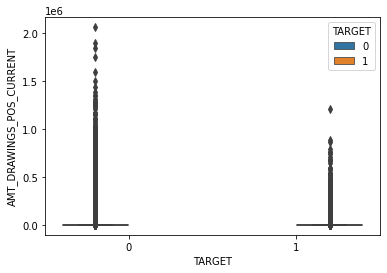

In [22]:
sns.boxplot(x='TARGET', y='AMT_DRAWINGS_POS_CURRENT',hue='TARGET', data=credit_card_balance)

<h2>TARGET / AMT_INST_MIN_REGULARITY (Versement minimal pour ce mois du crédit précédent)</h2>

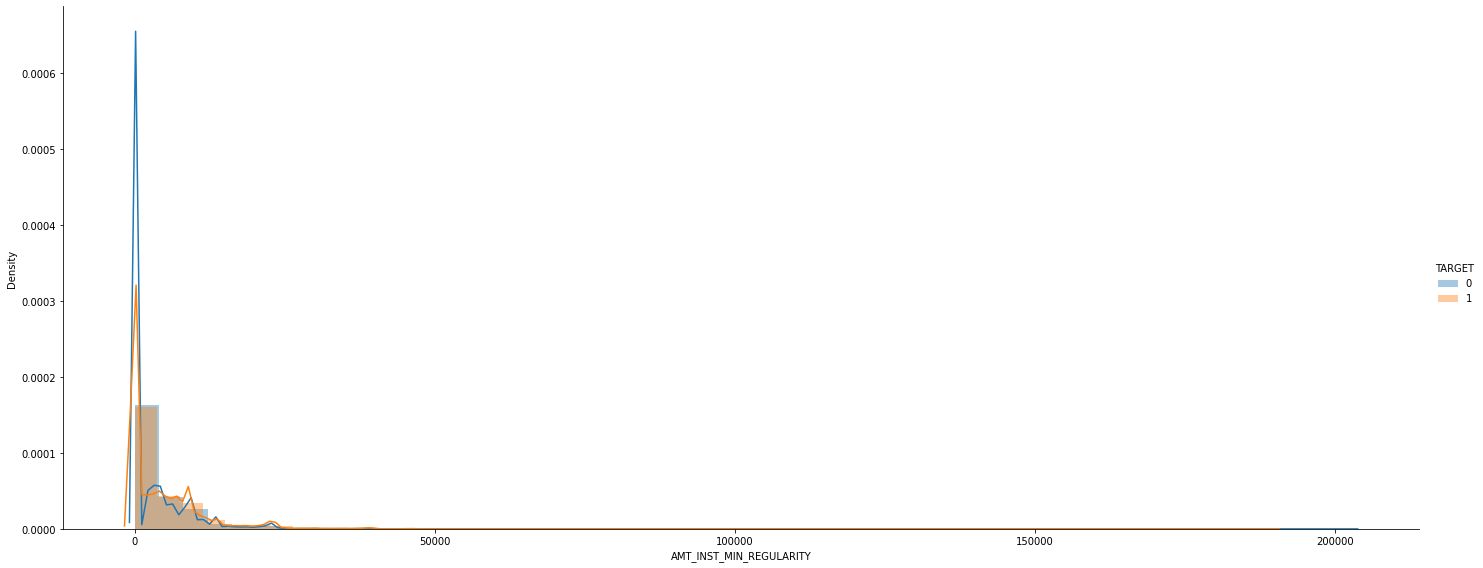

In [17]:
sns.FacetGrid(data=credit_card_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_INST_MIN_REGULARITY').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_INST_MIN_REGULARITY'>

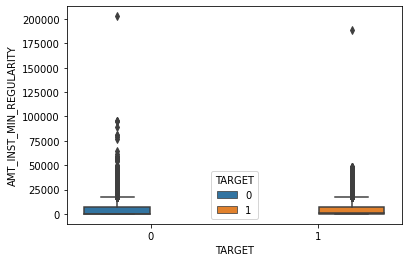

In [23]:
sns.boxplot(x='TARGET', y='AMT_INST_MIN_REGULARITY',hue='TARGET', data=credit_card_balance)

* outliers valeur > 150000

<h2>TARGET / AMT_PAYMENT_CURRENT (Combien le client a-t-il payé pendant le mois sur le crédit précédent)</h2>

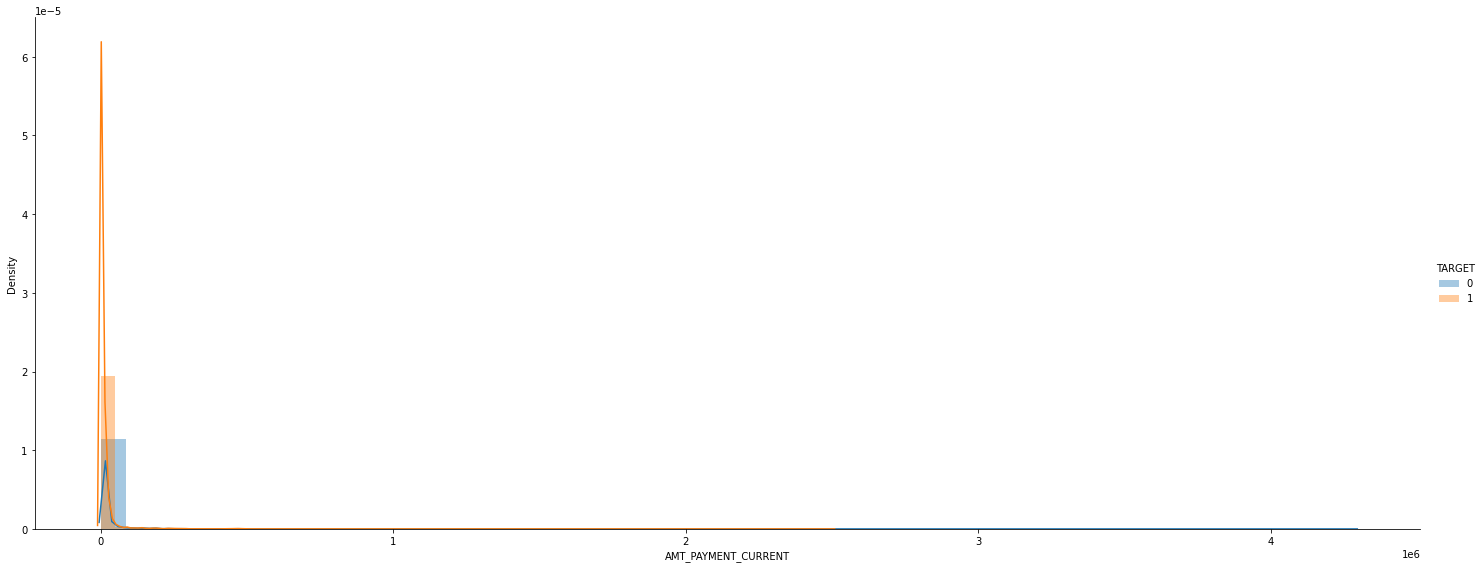

In [18]:
sns.FacetGrid(data=credit_card_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_PAYMENT_CURRENT').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_PAYMENT_CURRENT'>

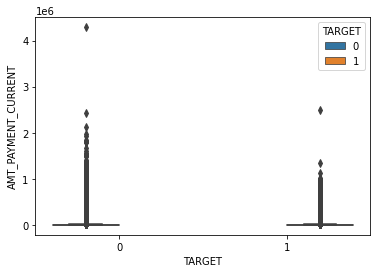

In [24]:
sns.boxplot(x='TARGET', y='AMT_PAYMENT_CURRENT',hue='TARGET', data=credit_card_balance)

* outliers valeurs > 3e6

<h2>TARGET / AMT_PAYMENT_TOTAL_CURRENT (Combien le client a-t-il payé au cours du mois au total sur le crédit précédent)</h2>

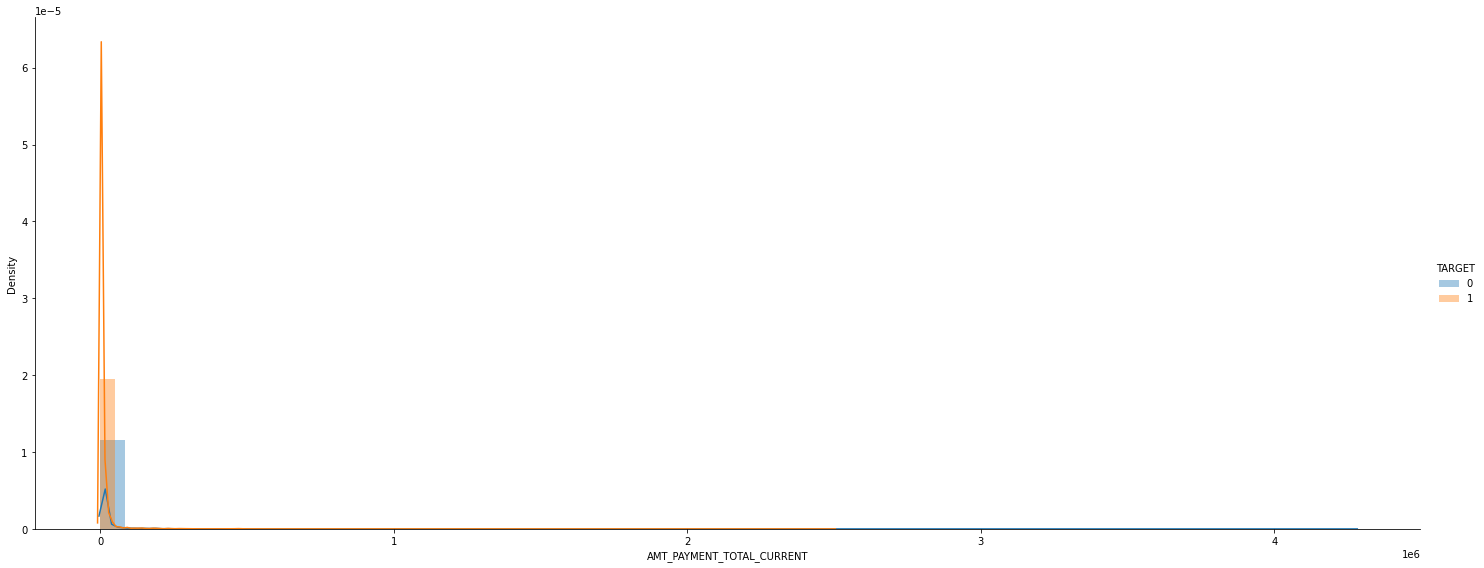

In [25]:
sns.FacetGrid(data=credit_card_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_PAYMENT_TOTAL_CURRENT').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_PAYMENT_TOTAL_CURRENT'>

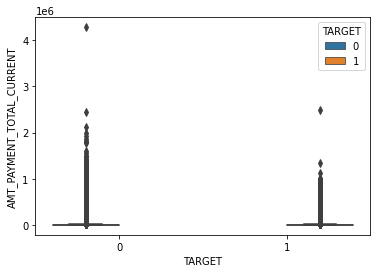

In [26]:
sns.boxplot(x='TARGET', y='AMT_PAYMENT_TOTAL_CURRENT',hue='TARGET', data=credit_card_balance)

* AMT_PAYMENT_TOTAL_CURRENT et AMT_PAYMENT_CURRENT correlation =1 ==> meme variable

<h2>TARGET / AMT_RECEIVABLE_PRINCIPAL (Montant des débiteurs pour le capital sur le crédit précédent)</h2>

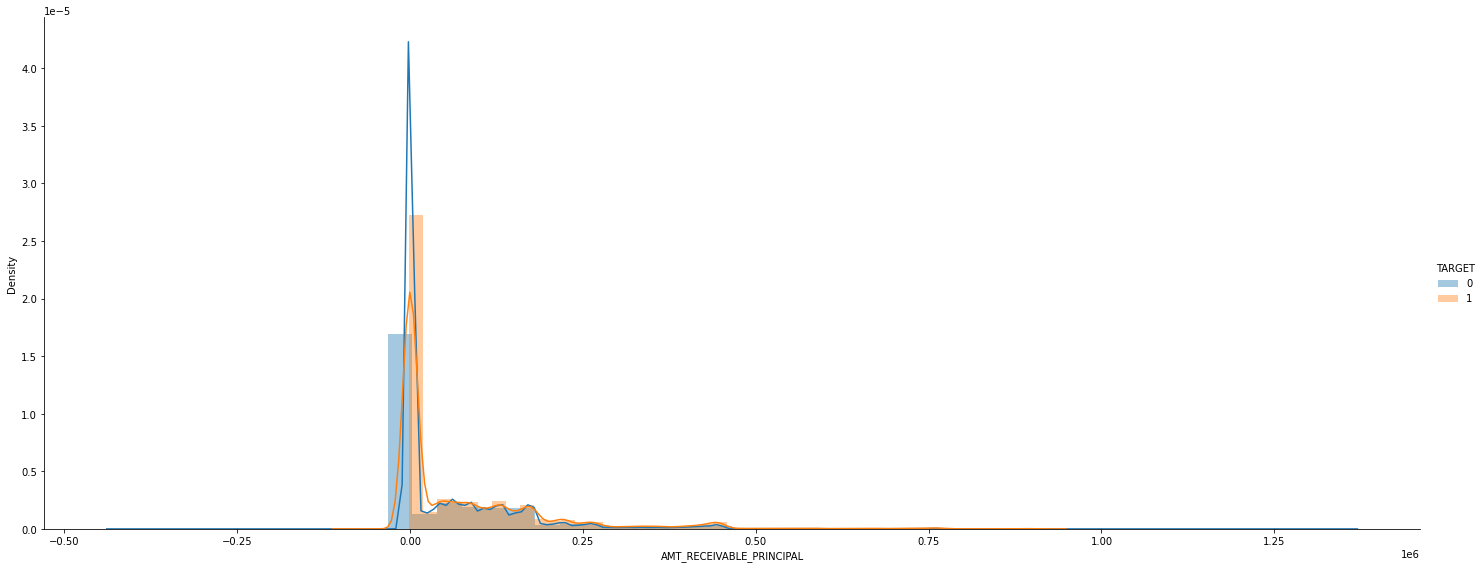

In [29]:
sns.FacetGrid(data=credit_card_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_RECEIVABLE_PRINCIPAL').add_legend()

<h2>TARGET / AMT_RECIVABLE (Montant des débiteurs sur le crédit précédent)</h2>

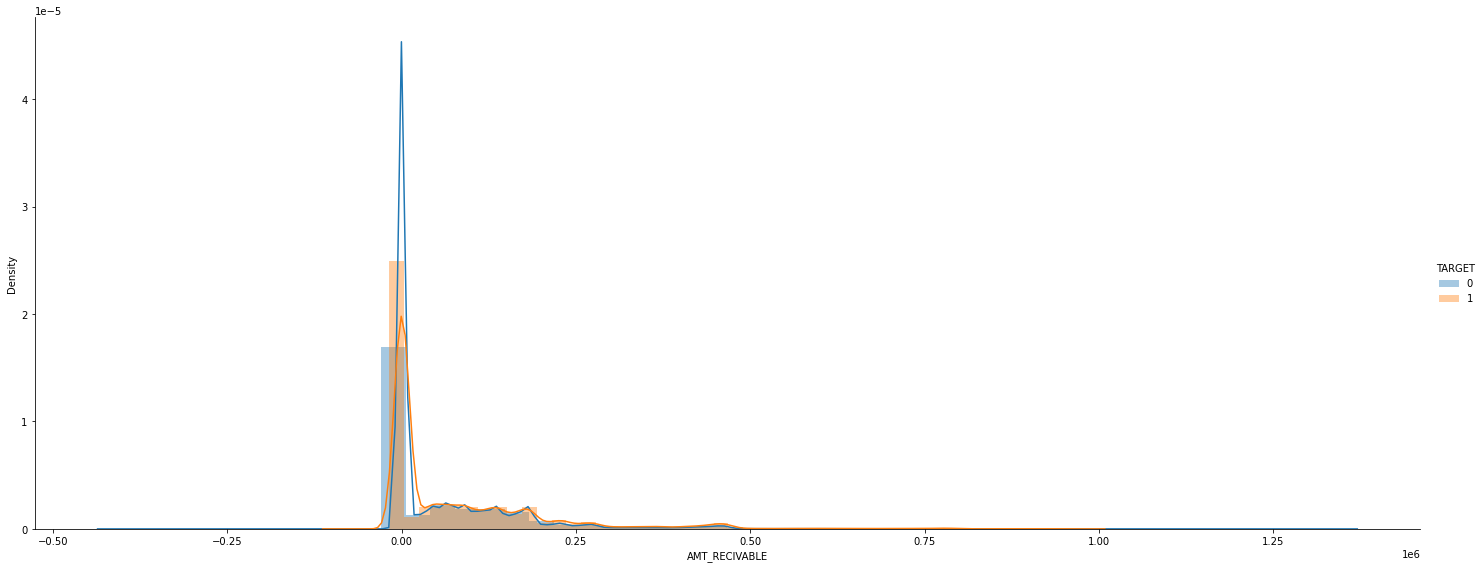

In [30]:
sns.FacetGrid(data=credit_card_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_RECIVABLE').add_legend()

<h2>TARGET / AMT_TOTAL_RECEIVABLE (Montant total à recevoir sur le crédit précédent)</h2>

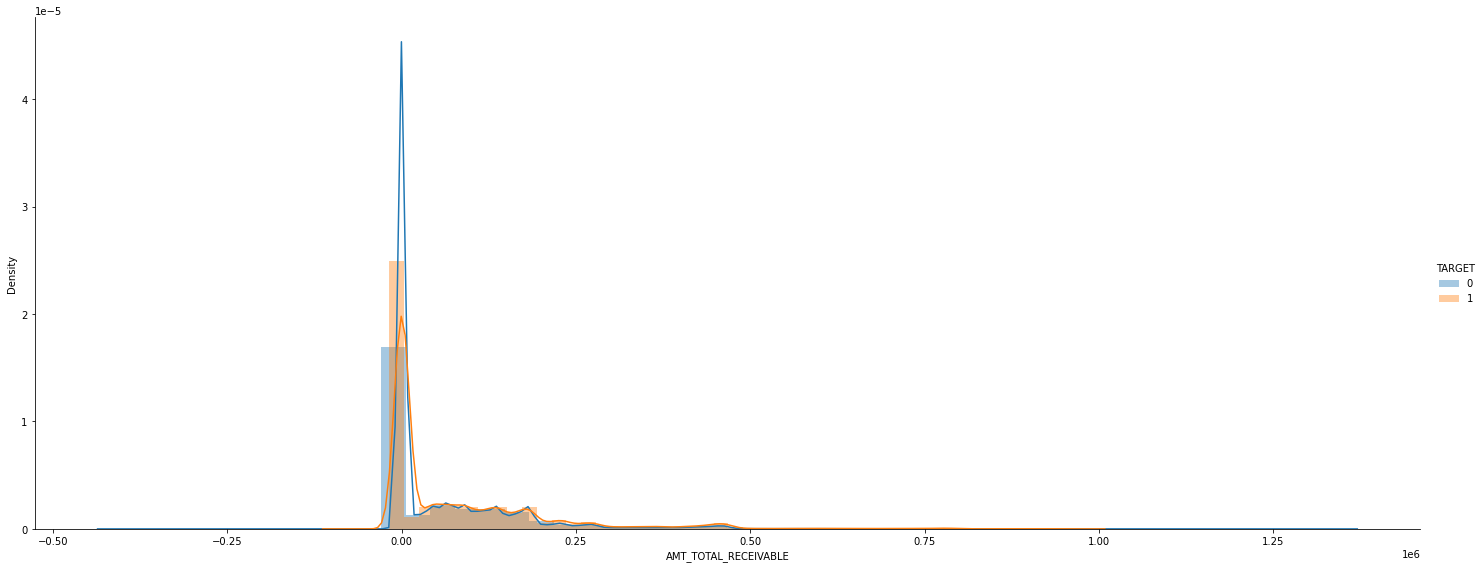

In [31]:
sns.FacetGrid(data=credit_card_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_TOTAL_RECEIVABLE').add_legend()

* AMT_RECEIVABLE_PRINCIPAL , AMT_RECIVABLE , AMT_TOTAL_RECEIVABLE ==> meme variables

<h2>TARGET / NAME_CONTRACT_STATUS (État du contrat (signé actif, ...) sur le crédit précédent)</h2>

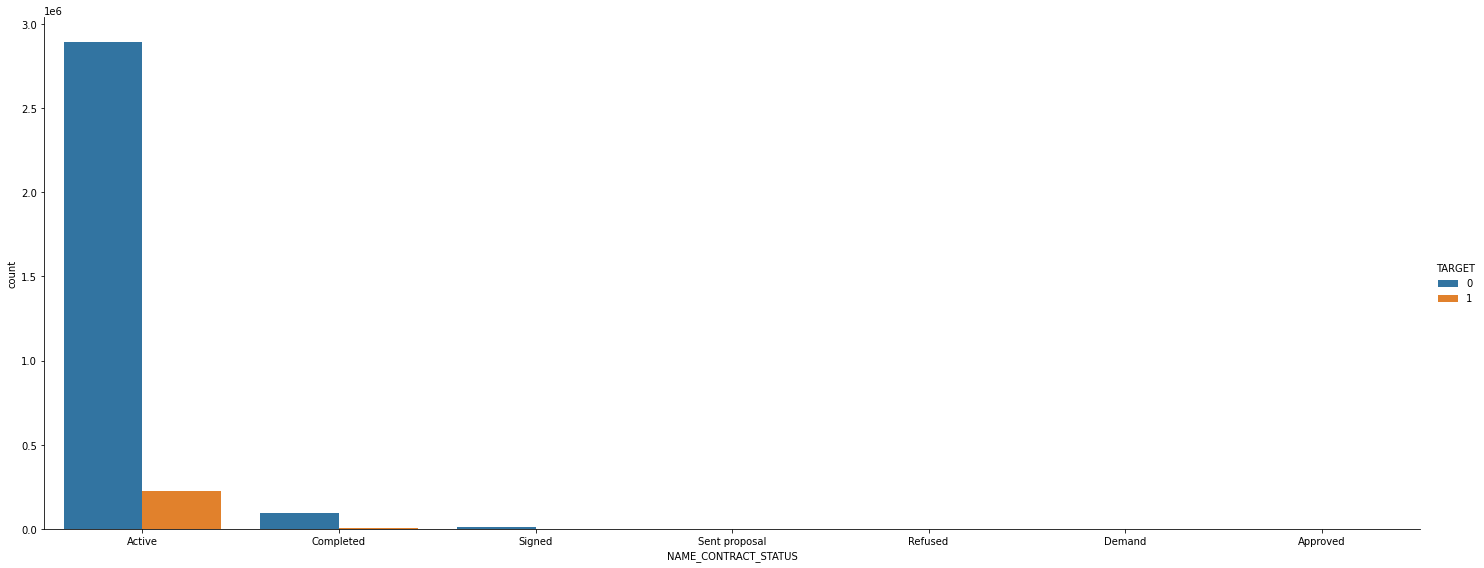

In [32]:
sns.catplot(x='NAME_CONTRACT_STATUS', kind="count",hue='TARGET', data=credit_card_balance , aspect=2.5, height=8)